In [390]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from datetime import datetime
from datetime import date

In [391]:
#data_1 = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')
#data = data_1.sample(n = 2000, random_state = 123)
data  =  pd.read_csv('lung_cancer_mortality_data_test_v2.csv')
data

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59.0,Female,Finland,2023-05-17,Stage I,2023-06-02,Yes,Current Smoker,36.1,248,1,0,1,0,Radiation,2024-06-19,0
996,997,46.0,Male,Belgium,2014-12-03,Stage III,2014-12-14,Yes,Former Smoker,24.3,233,1,0,0,0,Combined,2016-07-24,0
997,998,48.0,Female,Finland,2022-11-02,Stage II,2022-11-09,No,Never Smoked,28.5,155,1,0,0,0,Radiation,2024-06-14,0
998,999,65.0,Female,Bulgaria,2015-12-25,Stage I,2016-01-10,Yes,Current Smoker,28.8,174,0,1,0,0,Combined,2016-12-18,1


# EDA (Cleaning the data)

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   gender                       1000 non-null   object 
 3   country                      1000 non-null   object 
 4   diagnosis_date               1000 non-null   object 
 5   cancer_stage                 1000 non-null   object 
 6   beginning_of_treatment_date  1000 non-null   object 
 7   family_history               1000 non-null   object 
 8   smoking_status               1000 non-null   object 
 9   bmi                          1000 non-null   float64
 10  cholesterol_level            1000 non-null   int64  
 11  hypertension                 1000 non-null   int64  
 12  asthma                       1000 non-null   int64  
 13  cirrhosis          

In [393]:
# check the null values
data.isna().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

# Difference between the diagnose dates and treatments date

In [394]:
def datediff(x, y):
    date_x = datetime.strptime(x, "%Y-%m-%d")
    date_y = datetime.strptime(y, "%Y-%m-%d")
    diff = date_y - date_x
    return diff.days

# Number of days from diagnose_date to end_treatment_date
data["days_of_treatment"] = 0

for i in range(data.shape[0]):
    data.iloc[i, -1] = datediff(data.iloc[i, 4], data.iloc[i, -3])

# Number of days between diagnose_date and beginning_of_treatment_date
data["diagnosis_treatment_start"] = 0

for i in range(data.shape[0]):
    data.iloc[i, -1] = datediff(data.iloc[i, 4], data.iloc[i, 6])
data    

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_of_treatment,diagnosis_treatment_start
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0,309,2
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0,489,13
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1,717,5
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0,388,30
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0,593,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59.0,Female,Finland,2023-05-17,Stage I,2023-06-02,Yes,Current Smoker,36.1,248,1,0,1,0,Radiation,2024-06-19,0,399,16
996,997,46.0,Male,Belgium,2014-12-03,Stage III,2014-12-14,Yes,Former Smoker,24.3,233,1,0,0,0,Combined,2016-07-24,0,599,11
997,998,48.0,Female,Finland,2022-11-02,Stage II,2022-11-09,No,Never Smoked,28.5,155,1,0,0,0,Radiation,2024-06-14,0,590,7
998,999,65.0,Female,Bulgaria,2015-12-25,Stage I,2016-01-10,Yes,Current Smoker,28.8,174,0,1,0,0,Combined,2016-12-18,1,359,16


In [395]:
# change the data type int for age
data['age'] = data['age'].astype(int)

# change the data type for date columns

data["diagnosis_date"] = pd.to_datetime(data["diagnosis_date"], format = "%Y-%m-%d")
data["beginning_of_treatment_date"] = pd.to_datetime(data["beginning_of_treatment_date"], format = "%Y-%m-%d")
data["end_treatment_date"] = pd.to_datetime(data["end_treatment_date"], format = "%Y-%m-%d")


In [396]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_of_treatment,diagnosis_treatment_start
0,1,64,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0,309,2
1,2,50,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0,489,13
2,3,65,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1,717,5
3,4,51,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0,388,30
4,5,37,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0,593,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Female,Finland,2023-05-17,Stage I,2023-06-02,Yes,Current Smoker,36.1,248,1,0,1,0,Radiation,2024-06-19,0,399,16
996,997,46,Male,Belgium,2014-12-03,Stage III,2014-12-14,Yes,Former Smoker,24.3,233,1,0,0,0,Combined,2016-07-24,0,599,11
997,998,48,Female,Finland,2022-11-02,Stage II,2022-11-09,No,Never Smoked,28.5,155,1,0,0,0,Radiation,2024-06-14,0,590,7
998,999,65,Female,Bulgaria,2015-12-25,Stage I,2016-01-10,Yes,Current Smoker,28.8,174,0,1,0,0,Combined,2016-12-18,1,359,16


In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1000 non-null   int64         
 1   age                          1000 non-null   int32         
 2   gender                       1000 non-null   object        
 3   country                      1000 non-null   object        
 4   diagnosis_date               1000 non-null   datetime64[ns]
 5   cancer_stage                 1000 non-null   object        
 6   beginning_of_treatment_date  1000 non-null   datetime64[ns]
 7   family_history               1000 non-null   object        
 8   smoking_status               1000 non-null   object        
 9   bmi                          1000 non-null   float64       
 10  cholesterol_level            1000 non-null   int64         
 11  hypertension                 1000 non-null  

In [398]:
data["country"].nunique()

27

In [413]:
region_counts 

country
Ireland           56
Croatia           47
Italy             45
Romania           44
Spain             42
Lithuania         41
Poland            41
Bulgaria          40
Portugal          39
Estonia           39
Netherlands       39
Finland           39
Germany           37
Hungary           37
Greece            36
Cyprus            35
Austria           34
Slovakia          34
Belgium           33
Luxembourg        32
Malta             32
Latvia            32
France            31
Slovenia          30
Denmark           30
Czech Republic    29
Sweden            26
Name: count, dtype: int64

# Count number of cases by countries in Europe

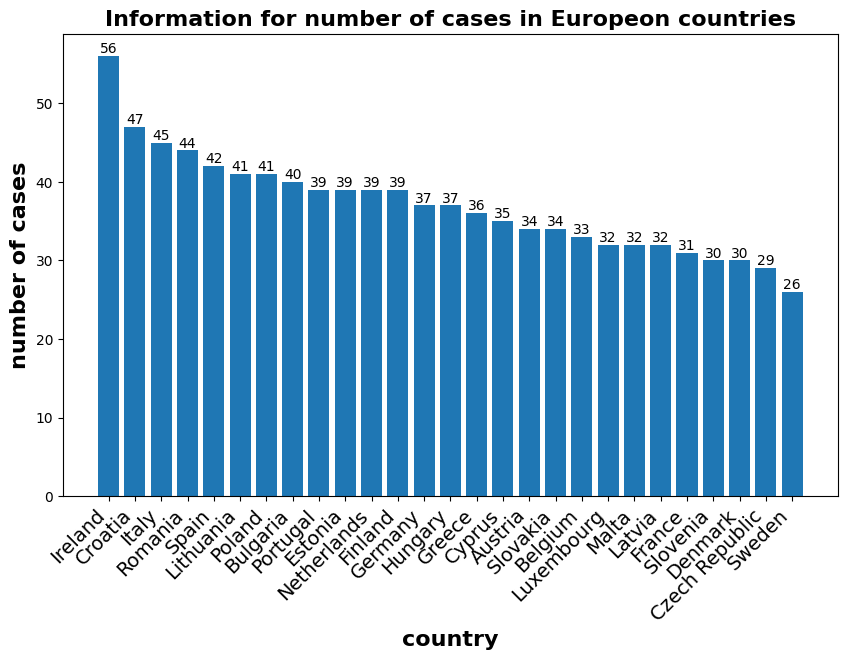

In [499]:
region_counts = data['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(region_counts.index, region_counts.values)
plt.bar_label(bar_plot, labels=region_counts.values, label_type='edge')
# Axis Details and Title
plt.xticks(rotation=45, ha='right', fontsize = 14)
plt.title("Information for number of cases in Europeon countries", fontweight = 'bold', fontsize = 16, color='black')  # Title for the plot
plt.xlabel("country", fontweight = 'bold', fontsize = 16, color='black')  # Label for the x-axis
plt.ylabel("number of cases", fontweight = 'bold', fontsize = 16, color='black')  # Label for the y-axis - not required
# plt.savefig('avg_price_nbhd.png',dpi =300)
plt.show()

# Detecting the outliars 

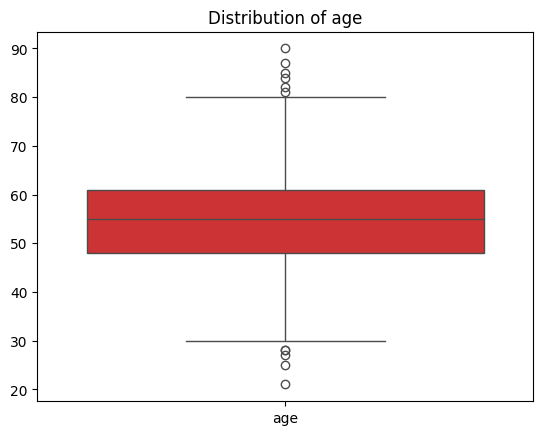

In [400]:
list_features_1 = ['age']
# sns.boxplot(data=data.loc[:,list_features_1],orient='h',palette = 'Set3')
sns.boxplot(data=data.loc[:,list_features_1],palette = 'Set1')
plt.title("Distribution of age")
#plt.ylabel("Plot B")
plt.show()

# Count of gender, family history, survivals, smoking status, treatment types and stages with the cases of lung cancer

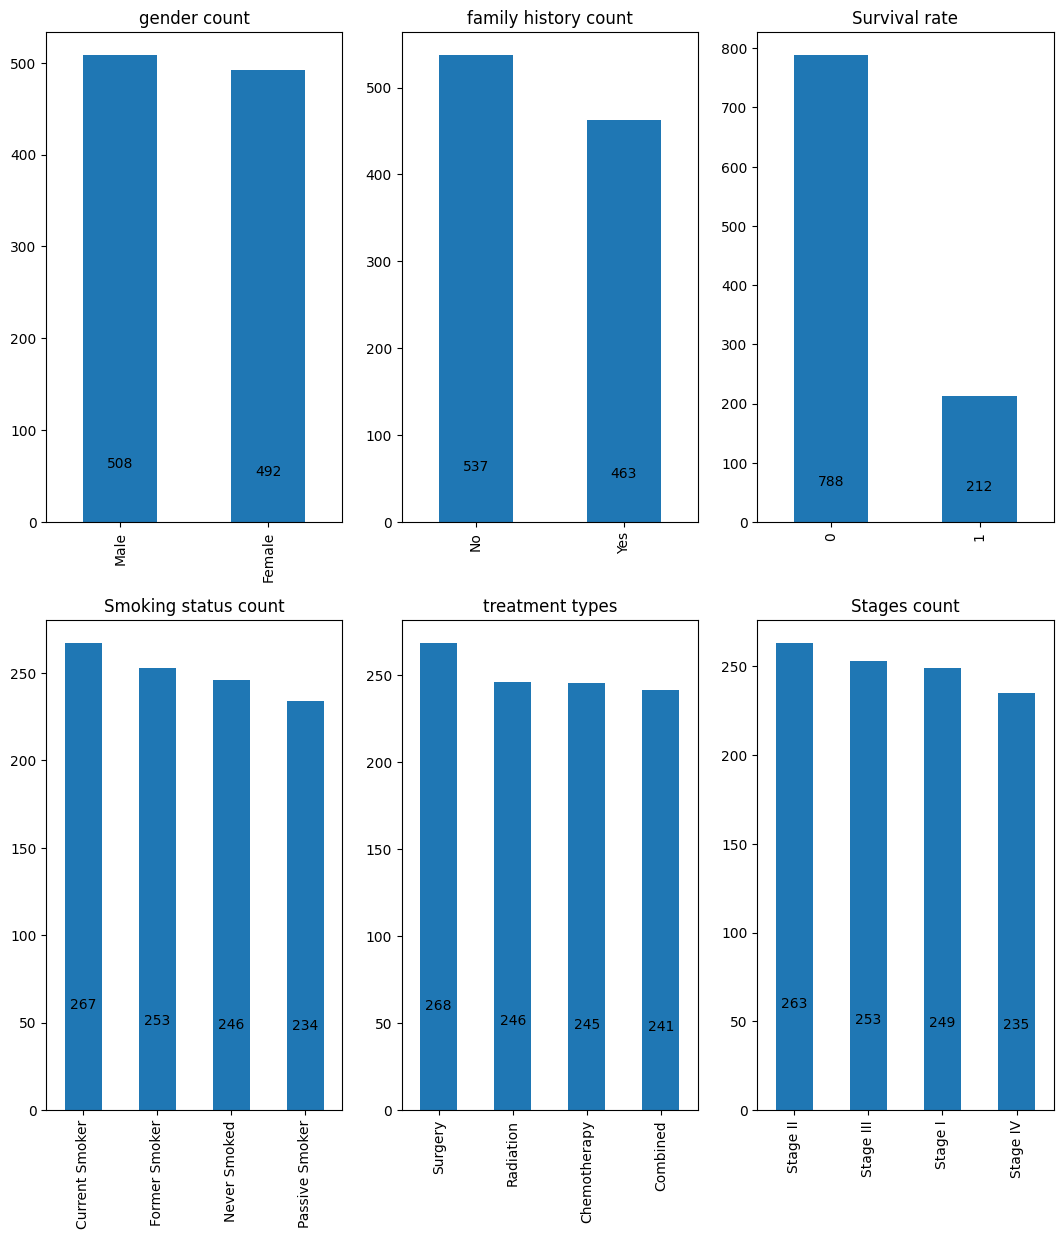

In [403]:
fig, axes = plt.subplots(nrows = 2, ncols=3, figsize=(13, 14))

count = data["gender"].value_counts()
count.plot(kind="bar", ax=axes[0,0])
axes[0,0].bar_label(bar_plot, labels=count.values, label_type='edge')
#axes[0].set_yticklabels(())
#axes[0,0].set_xticklabels(rotation=30, ha='right')
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("gender count")

count_1 = data["family_history"].value_counts()
count_1.plot(kind="bar", ax=axes[0,1])
axes[0,1].bar_label(bar_plot, labels=count_1.values, label_type='edge')
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("family history count")

count_3 = data["survived"].value_counts()
count_3.plot(kind="bar", ax=axes[0,2])
axes[0,2].bar_label(bar_plot, labels=count_3.values, label_type='edge')
axes[0,2].set_xlabel("")
axes[0,2].set_ylabel("")
axes[0,2].set_title("Survival rate")

count_3 = data["smoking_status"].value_counts()
count_3.plot(kind="bar", ax=axes[1,0])
axes[1,0].bar_label(bar_plot, labels=count_3.values, label_type='edge')
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Smoking status count")

count_4 = data["treatment_type"].value_counts()
count_4.plot(kind="bar", ax=axes[1,1])
axes[1,1].bar_label(bar_plot, labels=count_4.values, label_type='edge')
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("treatment types")

count_5 = data["cancer_stage"].value_counts()
count_5.plot(kind="bar", ax=axes[1,2])
axes[1,2].bar_label(bar_plot, labels=count_5.values, label_type='edge')
axes[1,2].set_xlabel("")
axes[1,2].set_ylabel("")
axes[1,2].set_title("Stages count")


plt.show()

# Survival rate of different stages of cancer and influence of treatment type on survival rate

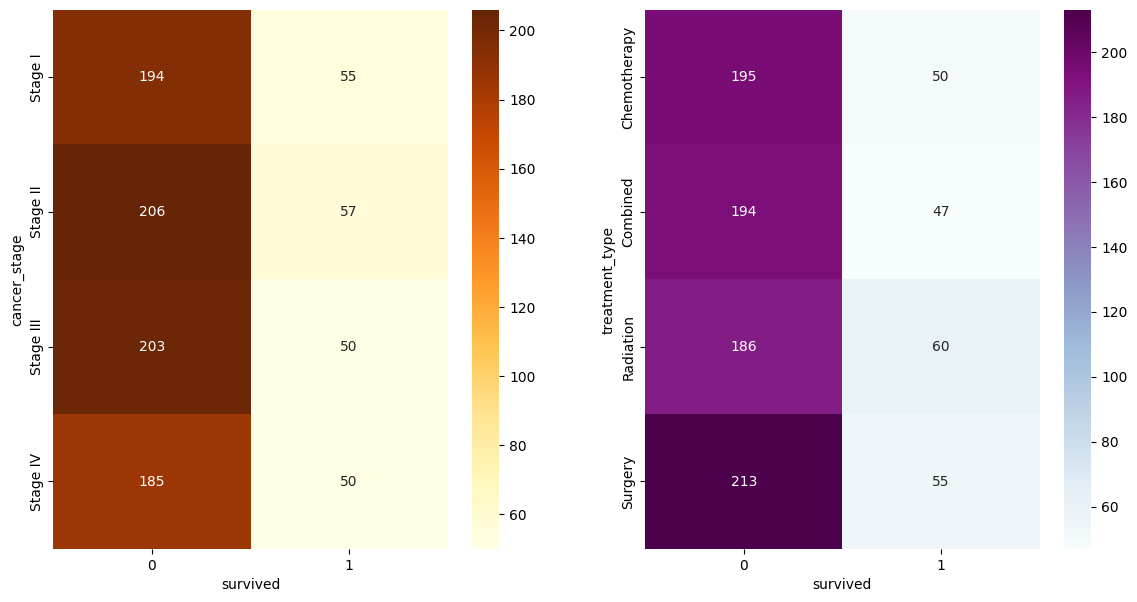

In [465]:
fig, axes = plt.subplots(nrows = 1 ,ncols=2, figsize=(14, 7))
cross = pd.crosstab(data["cancer_stage"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlOrBr",ax = axes[0])
cross = pd.crosstab(data["treatment_type"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="BuPu",ax = axes[1])
plt.show()

In [406]:
#sns.countplot(x='gender',data=data)
#plt.show()
#diganosis date - treatement start data = response time
#response time vs cancer stage
#response time vs age

# Average age in male and female of having lung cancer

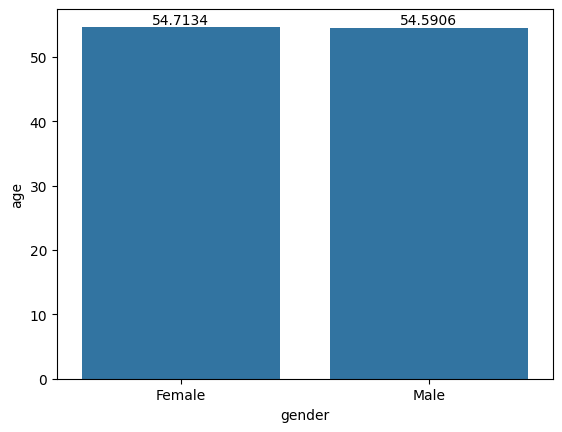

In [412]:
grouped = data.groupby("gender")
mean_age = grouped["age"].mean()
average_age = sns.barplot(x=mean_1.index, y=mean_1)
for container in average_age.containers:
    average_age.bar_label(container)
plt.show()

# Data distribution of age, bmi, cholestrol level and number of treatment days for survived and death cases

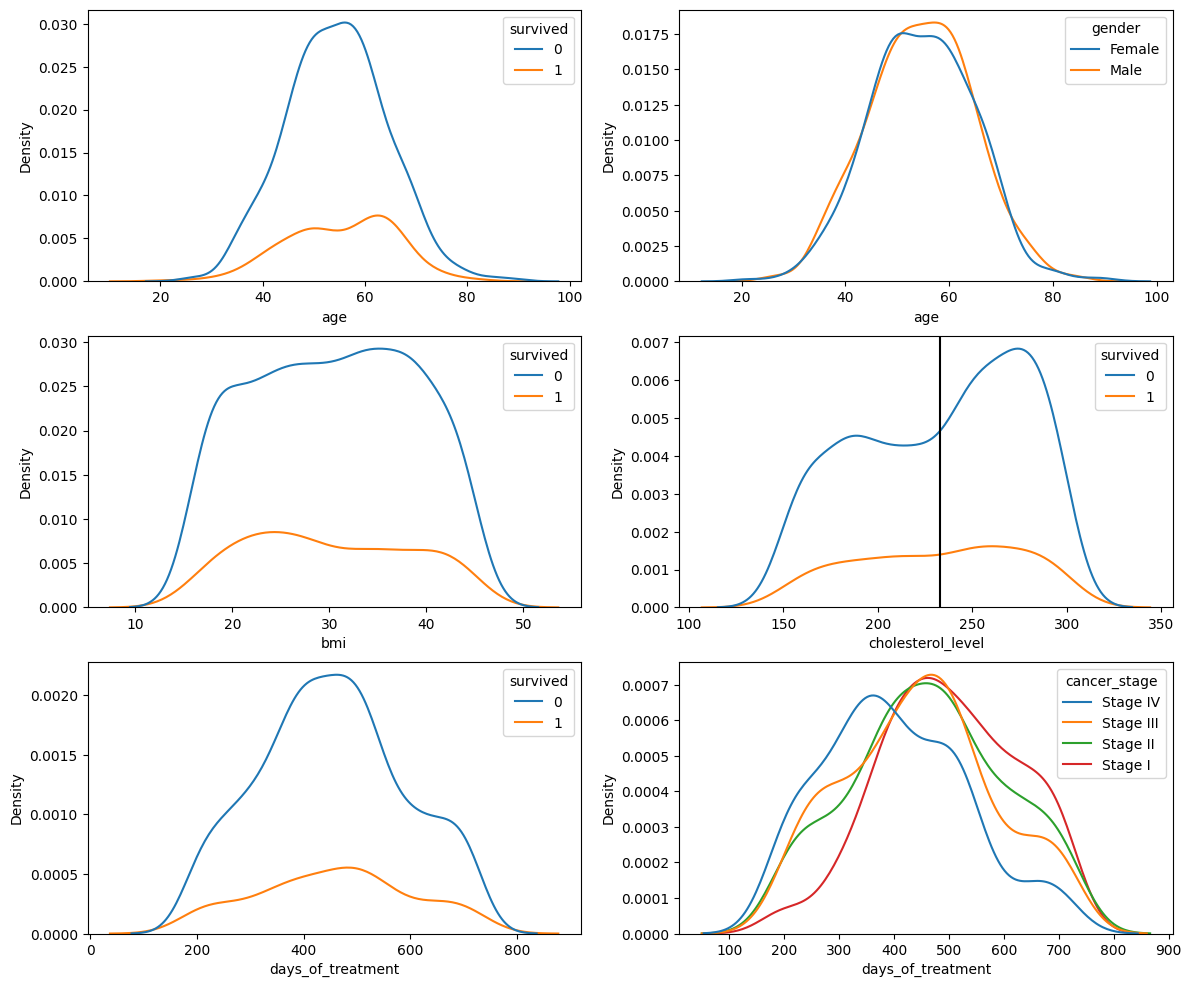

In [473]:
fig, axes = plt.subplots(ncols=2, nrows = 3, figsize=(14, 12))

sns.kdeplot(data, x="age", hue="survived", ax=axes[0,0])
sns.kdeplot(data, x="age", hue="gender", ax=axes[0,1])
sns.kdeplot(data, x="bmi", hue="survived", ax=axes[1,0])
sns.kdeplot(data, x="cholesterol_level", hue="survived",  ax=axes[1,1])
axes[1,1].axvline(data['cholesterol_level'].mean(),c= 'black')
sns.kdeplot(data, x="days_of_treatment", hue="survived", ax=axes[2,0])
sns.kdeplot(data, x="days_of_treatment", hue="cancer_stage", ax=axes[2,1])
plt.show()

# Influence of other diagnoses on outcome of treatment

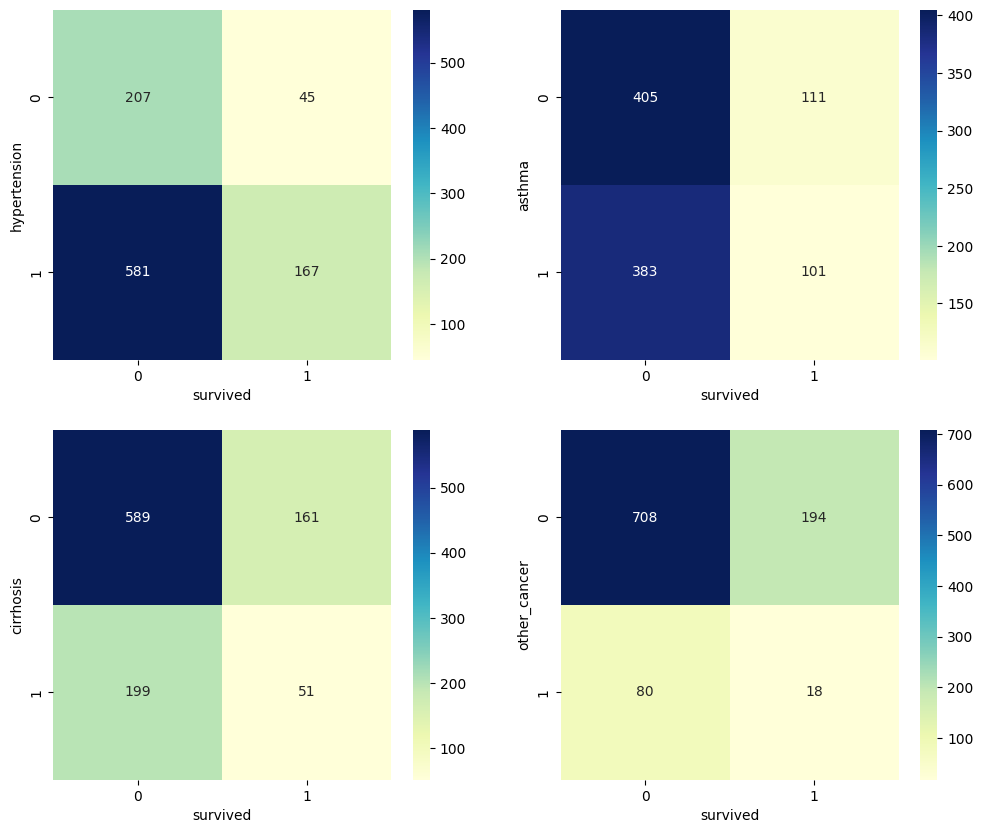

In [464]:
fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(12, 10))
cross = pd.crosstab(data["hypertension"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,0])
cross = pd.crosstab(data["asthma"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,1])
cross = pd.crosstab(data["cirrhosis"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,0])
cross = pd.crosstab(data["other_cancer"], data["survived"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,1])
plt.show()

# Explore the treatment type and smoking status by different cancer stages

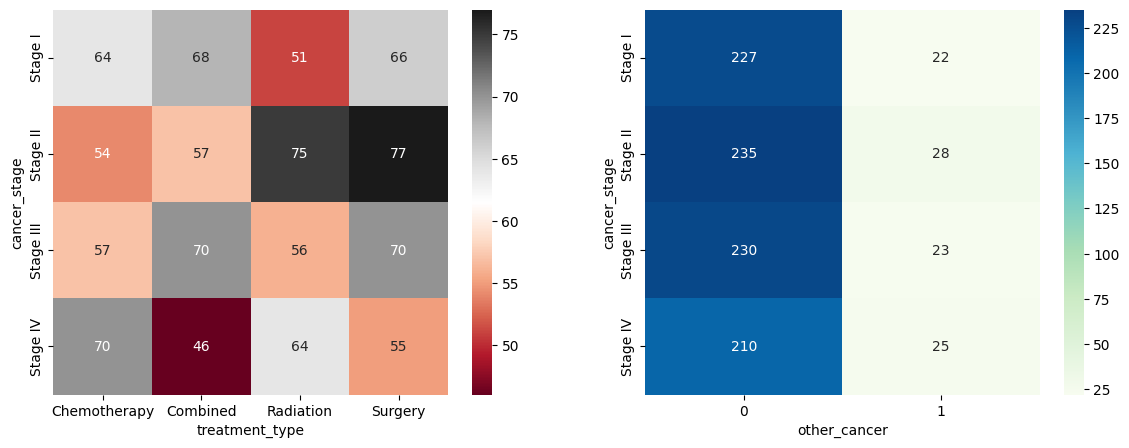

In [489]:
fig, axes = plt.subplots(nrows = 1 ,ncols=2, figsize=(14, 5))
cross = pd.crosstab(data["cancer_stage"], data["treatment_type"])
sns.heatmap(cross, annot=True, fmt='d', cmap="RdGy",ax = axes[0])
#cross = pd.crosstab(data["cancer_stage"], data["smoking_status"])
cross = pd.crosstab(data["cancer_stage"], data["other_cancer"])
sns.heatmap(cross, annot=True, fmt='d', cmap="GnBu",ax = axes[1])

plt.show()

# Countries that have higest no of death rates and highest no of survived cases

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_65080\2888187645.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_65080\2888187645.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


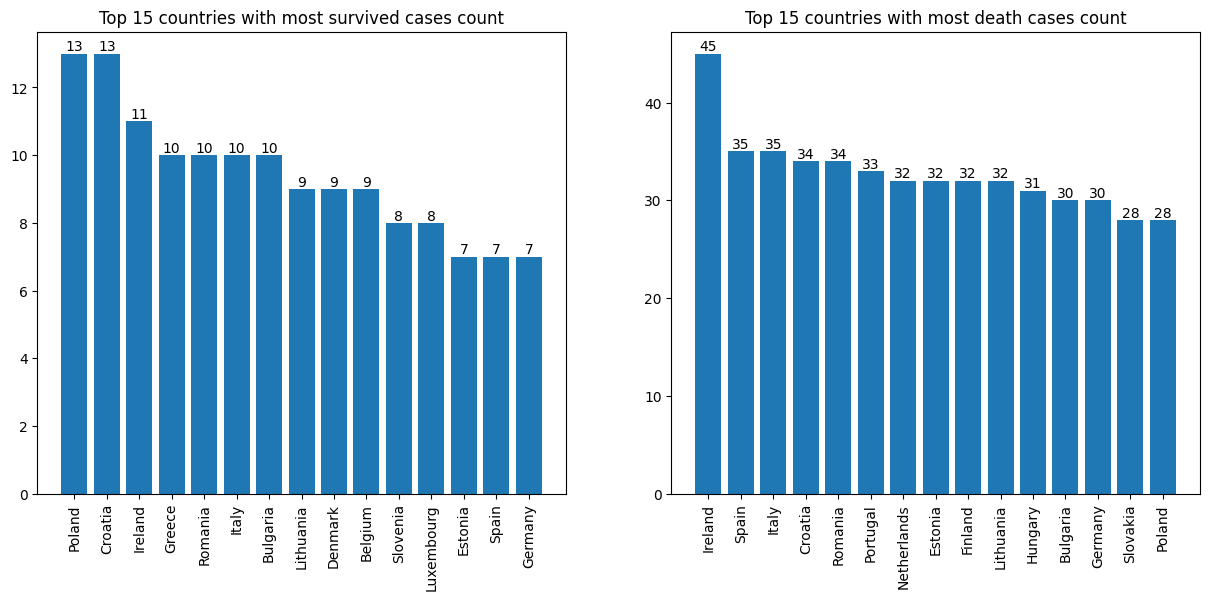

In [498]:
survived_data = data[data["survived"] == 1].copy()
death_data = data[data["survived"] == 0].copy()

# Calculate the counts
survived_count = survived_data["country"].value_counts().head(15)
death_count = death_data["country"].value_counts().head(15)

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Plot survived cases
bar1_plot = axes[0].bar(survived_count.index, survived_count.values)
axes[0].bar_label(bar1_plot, labels=survived_count.values, label_type='edge')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Top 15 countries with most survived cases count")

# Plot death cases
bar2_plot = axes[1].bar(death_count.index, death_count.values)
axes[1].bar_label(bar2_plot, labels=death_count.values, label_type='edge')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Top 15 countries with most death cases count")

# Display the plot
plt.show()